# Explore nationalities in relation to evolution over time

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Create a Pandas dataframe from SQL query

In [2]:
### Define the path to the file (a string in a variable 'db_file')
# if the data directory label is at the same level as the notebook,
# then the path is 'data/astronomers_import.db'
db_file_address = '../../data/astronomers_import.db'

In [3]:
### Create a connection to the SQLite database of your repository
# Beware : if the database does not exist at the specified address (db_file_address)
# it will be created and will be empty. Therefore, carefully check the database address
try:
    cn = sql.connect(db_file_address)    
except Exception as e:
    # if the connection does not work
    # an error message is raised
    print(e)    


In [4]:
### This ist the query that produces the data to be analysed.
# It has to be adapted to each use case
q1 = """
WITH tw1 AS (
SELECT natio_code, SUM(eff) as effectif_tot
from code_nationality_country
GROUP BY natio_code ),
--count each person just once
tw2 AS (
SELECT subject_uri, COUNT(*) eff, min(natio_country) natio_country, max(birthyear) birthyear
FROM dbp_person_countries dpc 
group by subject_uri)
SELECT tw2.birthyear, tw1.natio_code, tw1.effectif_tot
FROM tw2
   JOIN code_nationality_country cnc ON cnc.natio_country = tw2.natio_country 
   JOIN tw1 ON tw1.natio_code = cnc.natio_code 
WHERE LENGTH(cnc.natio_code) > 0
ORDER BY birthyear ;     
"""

In [5]:
c_df= pd.read_sql_query(q1, cn)
cn.close()
c_df.head()

,birthyear,natio_code,effectif_tot
0,1380,Austrian,72
1,1404,Italian,219
2,1423,Italian,219
3,1423,Austrian,72
4,1436,German,369


In [6]:
### Inspect maximum and minimum birth dates
print(c_df.birthyear.min(), c_df.birthyear.max())

1380 1993


In [7]:
### Exclude rows with 
c_df = c_df[c_df.effectif_tot > 10].sort_values(by=['natio_code','birthyear'])
c_df

,birthyear,natio_code,effectif_tot
150,1731,American,664
168,1740,American,664
215,1773,American,664
250,1789,American,664
254,1791,American,664
...,...,...,...
2027,1953,Swiss,56
2138,1961,Swiss,56
2162,1963,Swiss,56
2189,1966,Swiss,56


In [8]:
### Tableau avec les effectifs généraux
dc_df = c_df[['natio_code','effectif_tot']].groupby('natio_code').max()
dc_df

,effectif_tot
natio_code,
American,664
Argentinian,18
Austrian,72
British,300
Dutch,94
French,329
German,369
Indian,112
Italian,219


<Axes: ylabel='natio_code'>

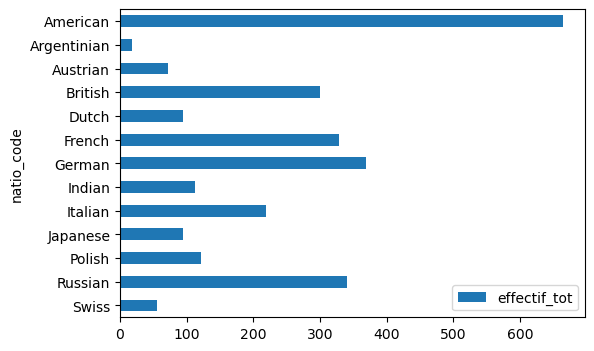

In [9]:
dc_df.sort_index(ascending=False).plot(kind='barh', figsize=(6,4))


<Axes: ylabel='natio_code'>

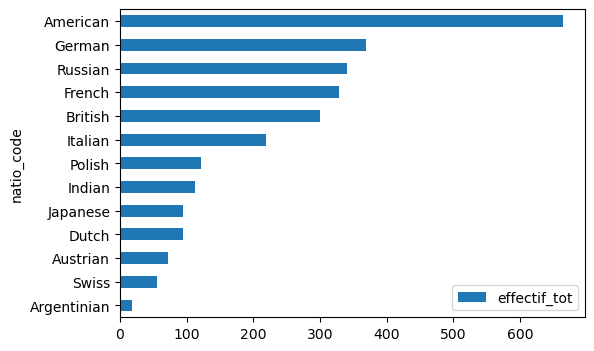

In [10]:
dc_df.sort_values(by='effectif_tot').plot(kind='barh', figsize=(6,4))

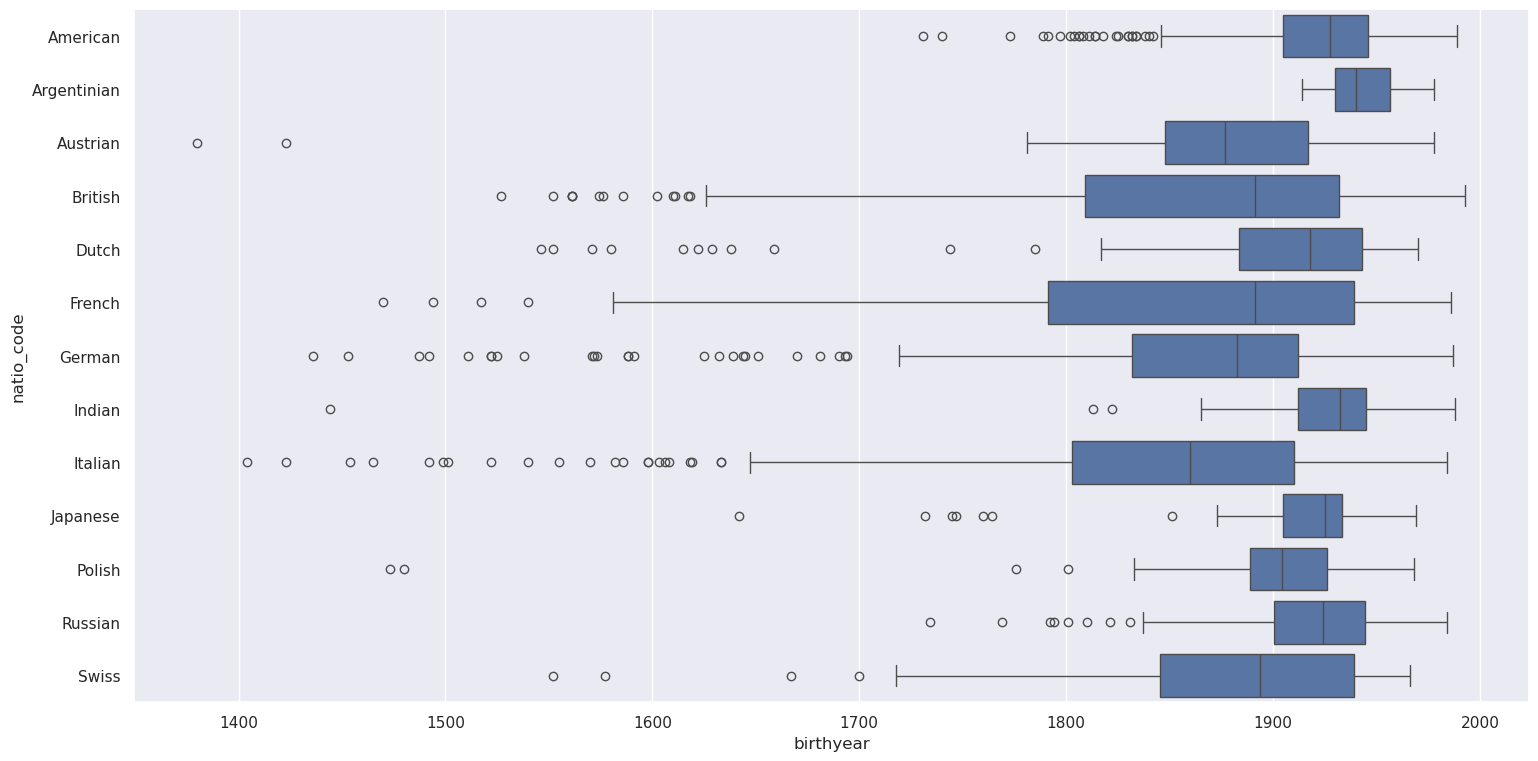

In [11]:
sns.set_theme(rc={'figure.figsize':(18,9)})
sns.boxplot(y=c_df["natio_code"], x=c_df.birthyear)
plt.show()

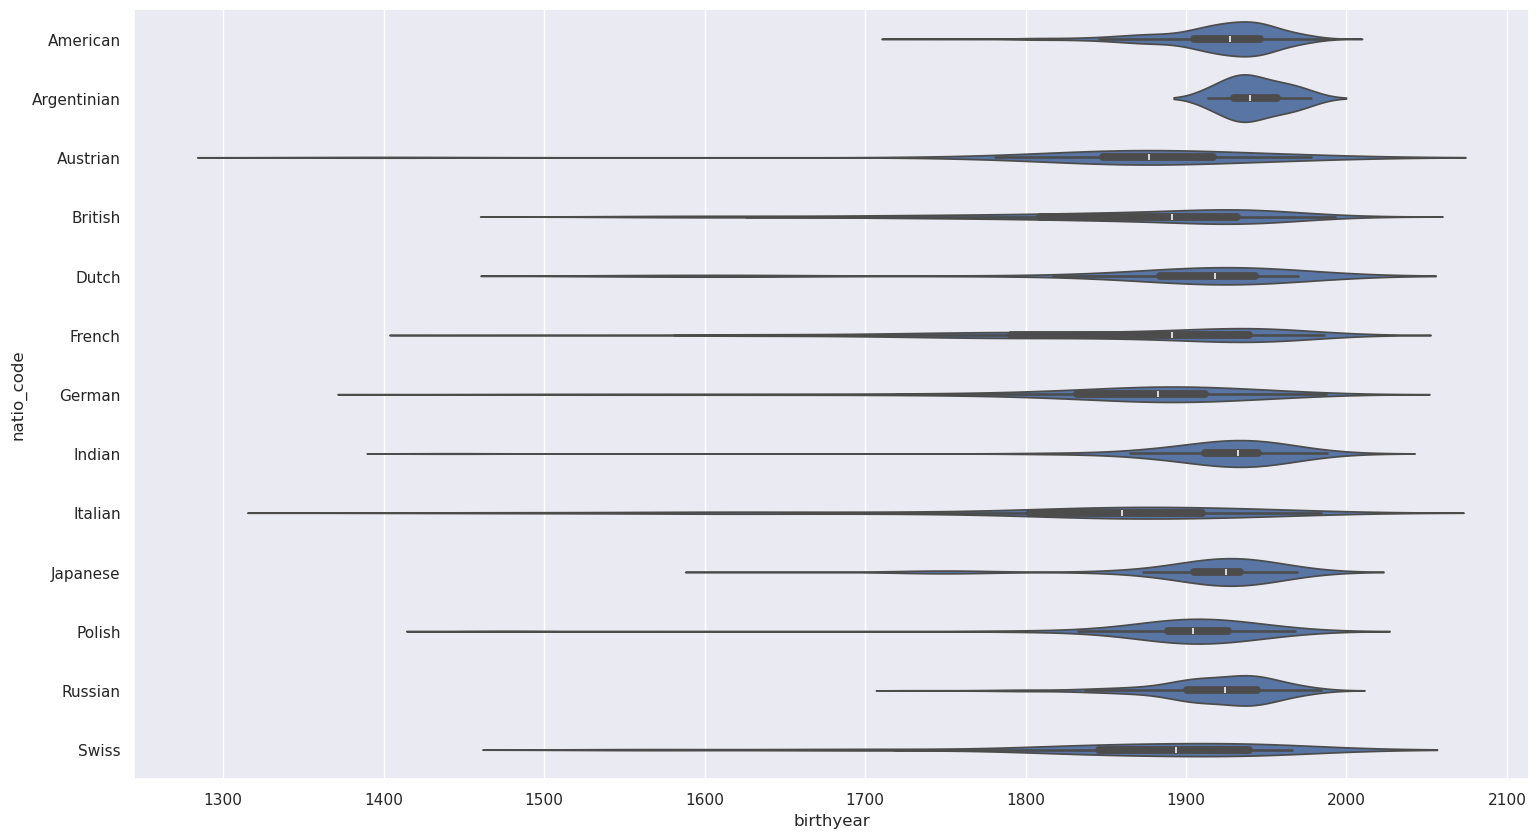

In [12]:
### Allows to inspect identity zones but not the proportion to global number
sns.set_theme(rc={'figure.figsize':(18,10)})
sns.violinplot(y='natio_code', x='birthyear', data=c_df)
plt.show()

/tmp/ipykernel_1031354/249416694.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax2 = sns.violinplot(y='natio_code', x='birthyear', data=c_df, scale='count')


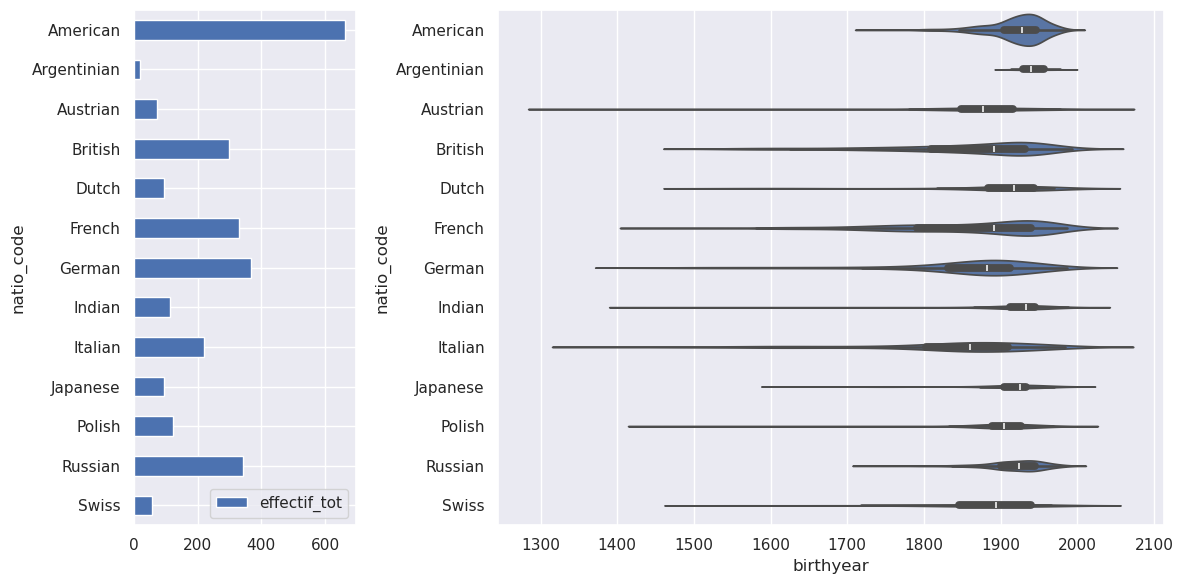

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,6),  width_ratios=[1, 3])
gd_df = c_df[['natio_code','effectif_tot']].groupby(by=['natio_code']).max()\
      .sort_index(ascending=False).plot(kind='barh', figsize=(12,6), ax=ax1)

#sns.set_theme(rc={'figure.figsize':(18,10)})
ax2 = sns.violinplot(y='natio_code', x='birthyear', data=c_df, scale='count')

fig.tight_layout()
plt.savefig('pictures/natio_code_birth_year_20241209.png')
plt.show()

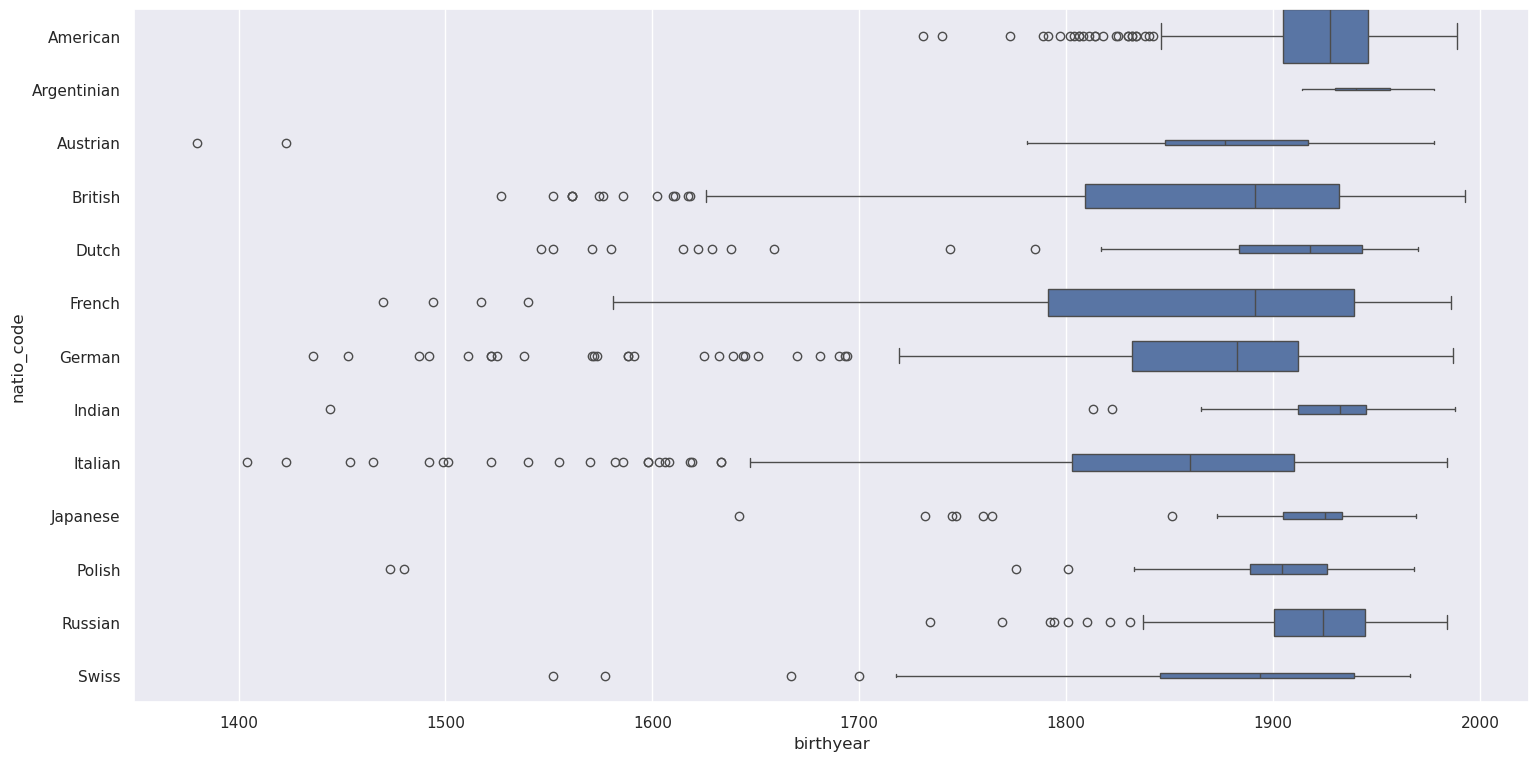

In [14]:
sns.set_theme(rc={'figure.figsize':(18,9)})

counts= dc_df.effectif_tot
total = float(sum(counts))
widths = [c/max(counts) for c in counts] 
sns.boxplot(y=c_df["natio_code"], x=c_df.birthyear, width=widths)
plt.show()

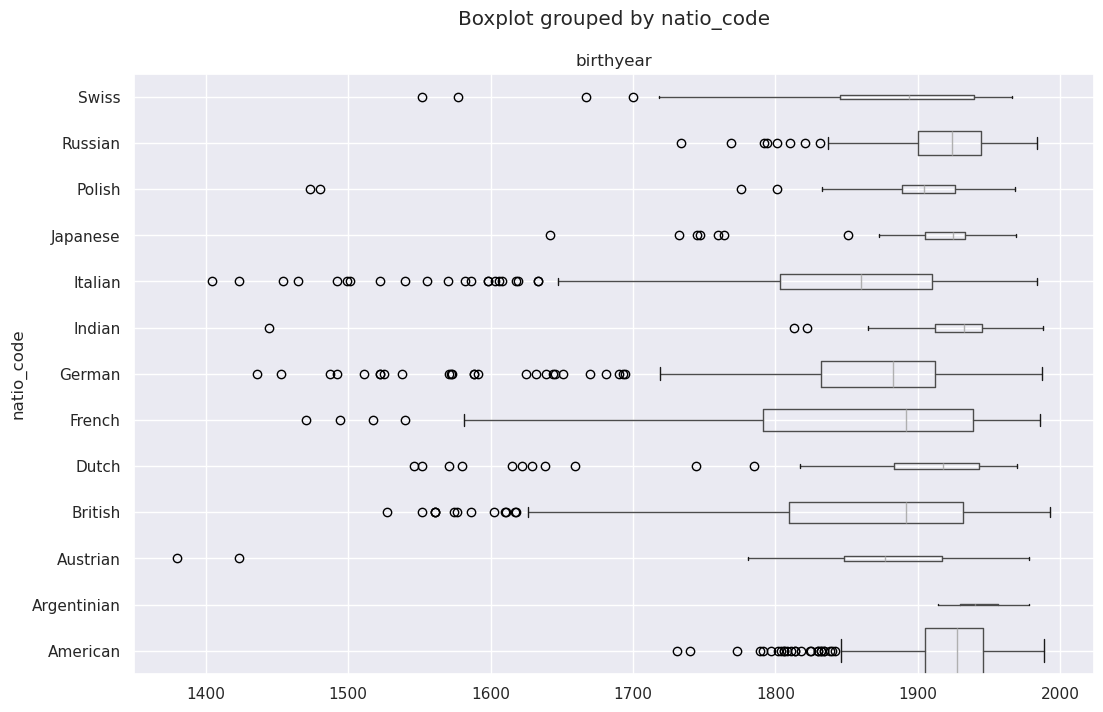

In [15]:
total = float(sum(counts))
widths = [c/max(counts) for c in counts] 
c_df.sort_values(by='natio_code', ascending=True).boxplot(column='birthyear', by='natio_code',  
          vert=False, widths=widths, figsize=(12,8))
plt.show()

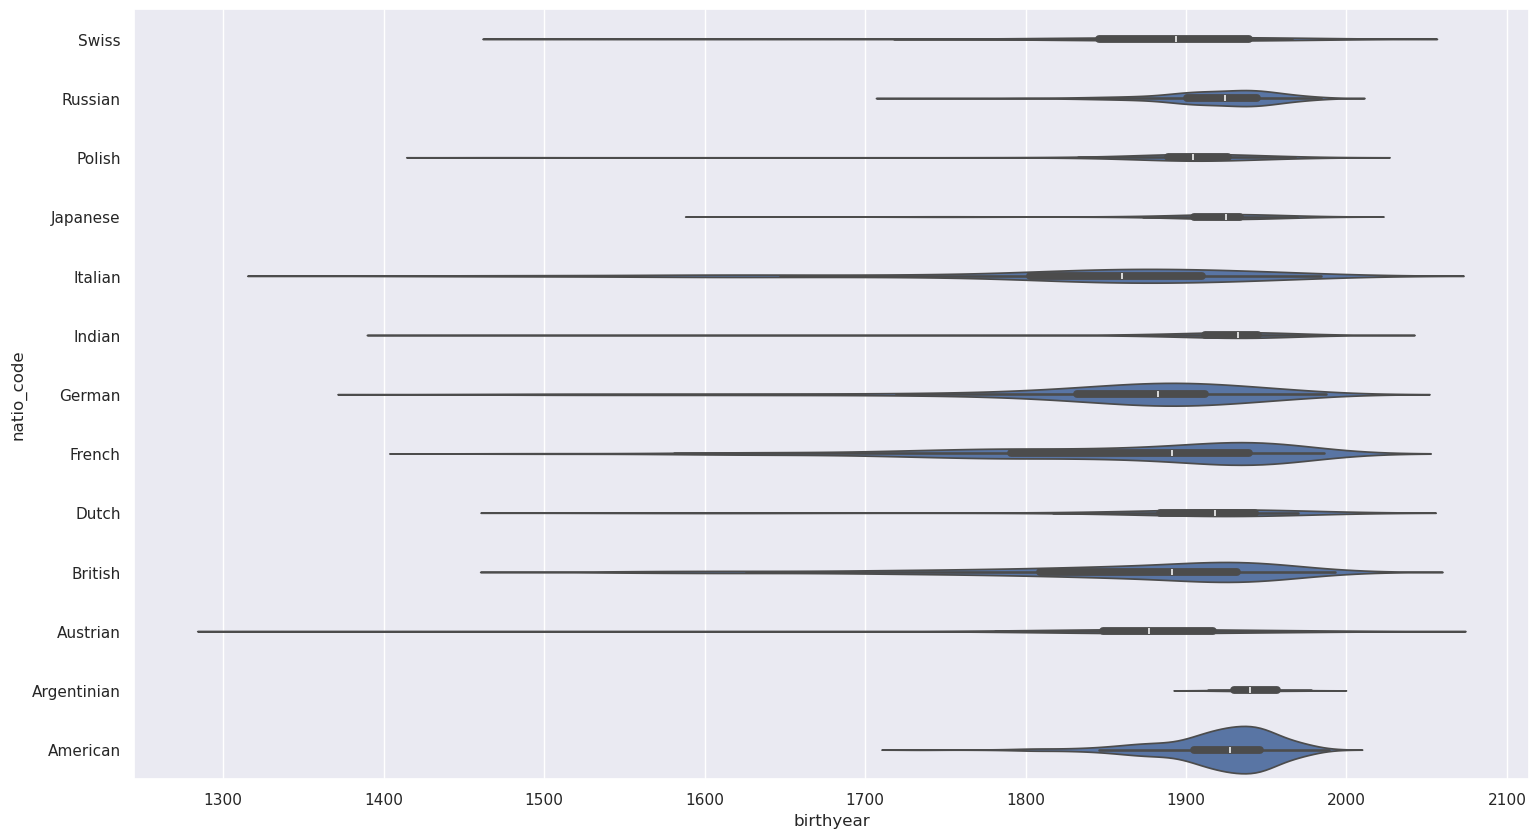

In [16]:
### Allows to inspect identity zones but not the proportion to global number
sns.set_theme(rc={'figure.figsize':(18,10)})

# with new density_norm argument 
sns.violinplot(y='natio_code', x='birthyear', density_norm='count', data=c_df.sort_values(by='natio_code', ascending=False))
plt.show()